In [4]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

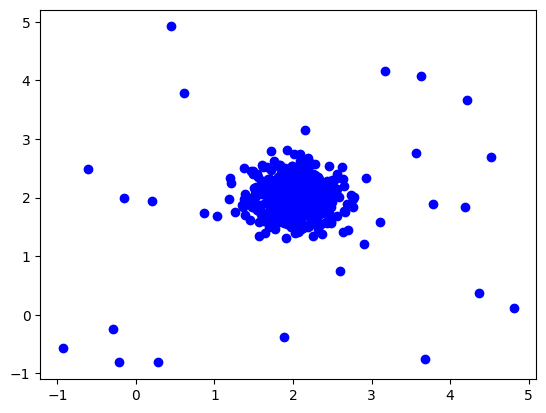

In [5]:
def make_blob_dataset(n_samples, contamination=0.05, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    X_outliers = rng.uniform(low=-1, high=5, size=(int(n_samples * contamination), 2))
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    return X

X = make_blob_dataset(500)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [6]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)


In [7]:
decision, y_pred = ocsvm.fit(X)

In [8]:
decision

array([ 2.61754018e-02,  7.66308758e-03, -8.89232639e-03,  2.94009003e-02,
        7.94768800e-03,  3.83000753e-02,  4.02913796e-03,  3.49452439e-02,
        4.61929230e-02,  3.99488603e-02,  1.12218938e-02,  2.29438835e-02,
       -1.35851435e-02,  3.54457457e-02,  2.76403985e-02,  3.42031305e-02,
        4.26730950e-02,  1.61341073e-02,  3.75857843e-02,  3.94318619e-02,
        4.65571270e-02,  3.63753810e-02,  7.22129424e-03,  4.23503837e-02,
        3.43426723e-02,  3.57323286e-02,  4.59020807e-02,  3.74430358e-02,
        4.37357081e-02,  4.14414972e-02,  3.92350928e-02,  4.43643943e-02,
        3.06566879e-02,  4.53808917e-02,  4.39290649e-02,  4.15358721e-02,
        2.18444984e-02,  3.74995514e-02, -1.55550367e-02, -1.23619812e-08,
        6.93054283e-03,  3.72529058e-02,  4.44700412e-02,  3.63195397e-02,
        3.21923595e-02,  2.85478342e-02,  1.08626439e-03,  2.54661515e-02,
        2.87932922e-02,  4.47540412e-02,  3.77043315e-02,  1.34527193e-02,
        4.51031281e-02,  

In [9]:
x_data = torch.tensor(X)

In [10]:
classifier = OneClassSVMClassifier(x_data, nu=0.5, gamma=0.8, num_inducing_points=100)

In [11]:
classifier.fit()

(array([-1.31819358e-02,  3.17730792e-02, -2.62401770e-01,  3.30048590e-02,
        -2.92537915e-01,  3.94316307e-02, -2.55591300e-01,  1.10447714e-02,
        -2.97620568e-01, -1.98825391e-01, -2.58207210e-01, -3.13397016e-02,
        -2.82687988e-01, -2.81721397e-01,  4.54354658e-02, -1.76785281e-01,
        -7.52228420e-03,  1.41839163e-02, -4.24256701e-02,  4.22301210e-02,
         3.22273209e-02,  1.63874978e-02, -2.72340886e-01, -2.72879133e-01,
        -1.77892267e-01, -2.59930102e-01,  2.04546144e-02,  4.21104586e-02,
        -5.99593790e-03,  1.23655256e-02,  2.25722945e-02, -2.60433311e-01,
        -2.73222406e-01, -1.20790762e-02, -1.56721165e-01, -5.27620772e-03,
         4.32846612e-02,  4.35453747e-02, -5.83587849e-03, -1.16827318e-01,
        -5.55111512e-17, -2.69605701e-01,  4.17715544e-02,  3.90040110e-02,
        -8.86447312e-02, -2.61085053e-01, -4.14686055e-02,  3.86684735e-02,
         2.73200484e-02, -4.18256956e-02, -8.71324795e-02,  1.38683988e-02,
        -2.6

In [12]:
decision, y_pred = classifier.decision()

In [13]:
decision

array([-1.31819358e-02,  3.17730792e-02, -2.62401770e-01,  3.30048590e-02,
       -2.92537915e-01,  3.94316307e-02, -2.55591300e-01,  1.10447714e-02,
       -2.97620568e-01, -1.98825391e-01, -2.58207210e-01, -3.13397016e-02,
       -2.82687988e-01, -2.81721397e-01,  4.54354658e-02, -1.76785281e-01,
       -7.52228420e-03,  1.41839163e-02, -4.24256701e-02,  4.22301210e-02,
        3.22273209e-02,  1.63874978e-02, -2.72340886e-01, -2.72879133e-01,
       -1.77892267e-01, -2.59930102e-01,  2.04546144e-02,  4.21104586e-02,
       -5.99593790e-03,  1.23655256e-02,  2.25722945e-02, -2.60433311e-01,
       -2.73222406e-01, -1.20790762e-02, -1.56721165e-01, -5.27620772e-03,
        4.32846612e-02,  4.35453747e-02, -5.83587849e-03, -1.16827318e-01,
       -5.55111512e-17, -2.69605701e-01,  4.17715544e-02,  3.90040110e-02,
       -8.86447312e-02, -2.61085053e-01, -4.14686055e-02,  3.86684735e-02,
        2.73200484e-02, -4.18256956e-02, -8.71324795e-02,  1.38683988e-02,
       -2.68252807e-01,  

In [14]:
y_pred

array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.])

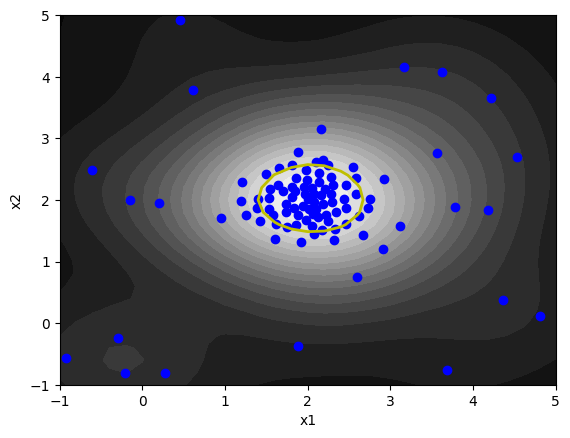

In [15]:
classifier.plot()

In [16]:
# create object of ocsvmshap
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP

In [17]:
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [18]:
x_data.shape
2**x_data.shape[1]

4

In [19]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 323.98it/s]


In [20]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()

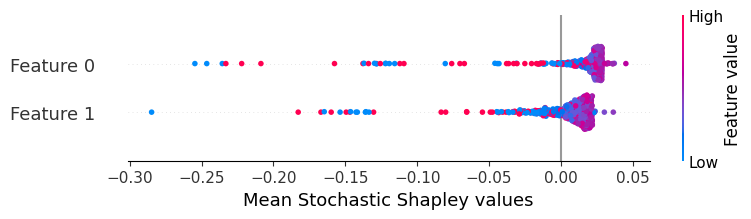

In [21]:
summary_plot(mean_stochastic_shapley_values, x_data)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [22]:
from src.utils.visualisation.deterministic_values import bar_plot
bar_plot(mean_stochastic_shapley_values, x_data)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Dataset 2

In [23]:
import numpy as np
import pandas as pd
import torch
from sklearn.datasets import make_blobs


In [24]:
# blob with a line 
def make_new_blob_dataset(n_samples, contamination=0.02, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    
    # Generate outliers in one direction for the first feature
    X_outliers = np.column_stack((
        rng.uniform(low=4, high=5, size=(20,)),  
        rng.uniform(low=-1, high=5, size=(20,)) 
    ))
    
    # Combine the datasets
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    
    return X

The intention is to say that the straight line on the right are all outliers adn they are outliers becaue their x value is more than the regular inliners

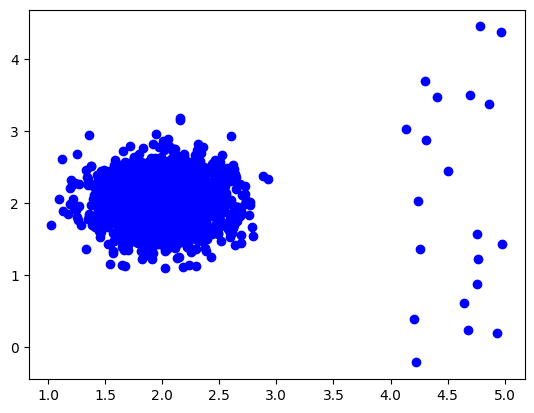

In [30]:
X = make_new_blob_dataset(2000, contamination=0.1)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [31]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)
decision, y_pred = ocsvm.fit(X)
x_data = torch.tensor(X)

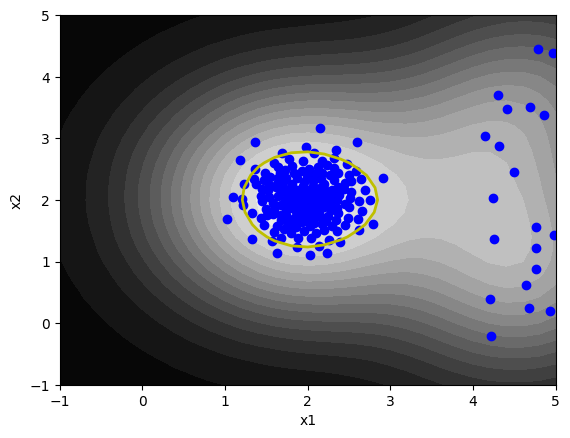

In [32]:
classifier = OneClassSVMClassifier(x_data, nu=0.2, gamma=0.5, num_inducing_points=200)
classifier.fit()
decision, y_pred = classifier.decision()
classifier.plot()

In [33]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 2870.84it/s]


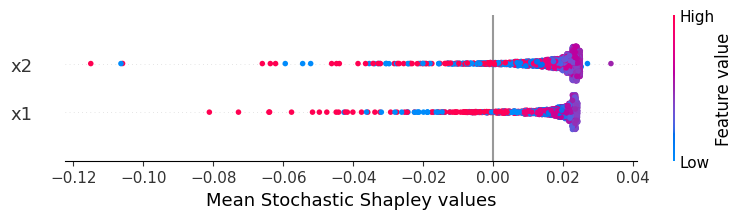

In [34]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=['x1', 'x2'])
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [37]:
mean_stochastic_shapley_values.shape

torch.Size([2, 1820])

## Datatset3 

In [86]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data

In [87]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

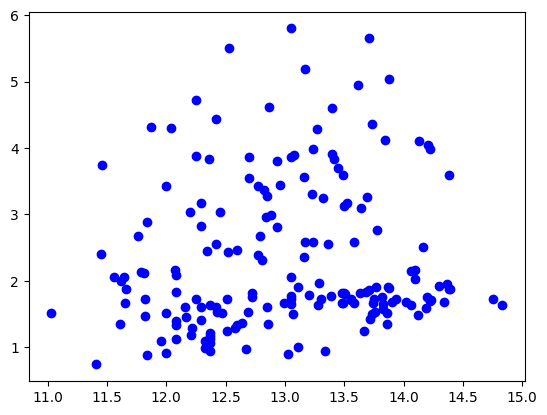

In [88]:
plt.scatter(X[:, 0], X[:, 1], color='b');